# Interspeech


In [1]:
import matplotlib.pyplot

In [2]:
import numpy as np
import pandas as pd

import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from sklearn.model_selection import train_test_split
import random

import keras
from keras import backend as K
from keras import layers

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import Convolution2D

from keras.layers.core import Dense, Permute, Reshape
from keras.layers.normalization import BatchNormalization
from keras.layers.wrappers import Bidirectional
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.regularizers import l2

import tensorflow as tf

C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
global X, T
X=[]
T=[]

In [4]:
def loaddata(filename,num):
    f=sio.loadmat(filename)
    data=f['cep']
    data=np.asarray(data)
    mean=np.mean(data,axis=0)
    std=np.std(data,axis=0)
    data=(data-mean)/std
    data=np.asarray(np.vsplit(data[0:int(data.shape[0]/data.shape[1])*data.shape[1]],int(data.shape[0]/data.shape[1])))
    for i in range (data.shape[0]):
        X.append(data[i])
        T.append(num)
    return X, T

In [5]:
X,T = loaddata('Database/MTMAG/Assamese_.mat',0)
len(X), len(T)

(7478, 7478)

In [6]:
X,T = loaddata('Database/MTMAG/Gujrati_.mat',1)
len(X), len(T)

(11261, 11261)

In [7]:
X,T = loaddata('Database/MTMAG/hindi_.mat',2)
len(X),len(T)

(16946, 16946)

In [8]:
X,T = loaddata('Database/MTMAG/Kannada_.mat',3)
len(X),len(T)

(23995, 23995)

In [9]:
X,T = loaddata('Database/MTMAG/Punjabi_.mat',4)
len(X),len(T)

(31421, 31421)

In [10]:
X,T = loaddata('Database/MTMAG/Telugu_.mat',5)
len(X),len(T)

(39009, 39009)

## Split Dataset

In [11]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(np.array(X),np.array(T), train_size=0.8, random_state=30)
np.array(Xtrain).shape, np.array(Xtest).shape

C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((31207, 39, 39), (7802, 39, 39))

## Convert 2D dataset to a 1D vector

In [12]:
batchSize=128
num_classes=6
epochs=10
imageRows, imageCols =39,39

In [13]:
Xtrain = Xtrain.reshape(Xtrain.shape[0], imageRows, imageCols, 1)
Xtest = Xtest.reshape(Xtest.shape[0], imageRows,imageCols, 1)
input_shape = (imageRows, imageCols, 1)
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')

In [14]:
input_shape

(39, 39, 1)

In [15]:
Ytrain = keras.utils.to_categorical(Ytrain, num_classes)
Ytest = keras.utils.to_categorical(Ytest, num_classes)

## Define CNN Model

In [16]:
weight_decay = 0.001

model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu", input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # (bs, y, x, c) --> (bs, x, y, c)
model.add(Permute((2, 1, 3)))

    # (bs, x, y, c) --> (bs, x, y * c)
bs, x, y, c = model.layers[-1].output_shape
model.add(Reshape((x, y*c)))

model.add(Bidirectional(LSTM(256, return_sequences=False), merge_mode="concat"))
model.add(Dense(num_classes, activation="softmax"))


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_regularizer=<keras.reg..., kernel_size=(3, 3), padding="same", input_shape=(39, 39, 1..., activation="relu")`
  """
C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, kernel_regularizer=<keras.reg..., kernel_size=(3, 3), activation="relu", padding="same")`
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, kernel_regularizer=<keras.reg..., kernel_size=(3, 3), activation="relu", padding="same")`
  del sys.path[0]
C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, kernel_re

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 39, 39, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 39, 39, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 19, 19, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 256)         295168    
__________

## Model Train

In [18]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [19]:
speechTrainData=model.fit(Xtrain, Ytrain,batch_size=batchSize,epochs=epochs,verbose=1,validation_data=(Xtest, Ytest))

Train on 31207 samples, validate on 7802 samples
Epoch 1/10
31207/31207 [==============================] - 33s 1ms/step - loss: 2.1237 - acc: 0.7368 - val_loss: 2.3747 - val_acc: 0.6638
Epoch 2/10
31207/31207 [==============================] - 31s 987us/step - loss: 1.0268 - acc: 0.9263 - val_loss: 1.1249 - val_acc: 0.8365
Epoch 3/10
31207/31207 [==============================] - 31s 1ms/step - loss: 0.6464 - acc: 0.9536 - val_loss: 0.5806 - val_acc: 0.9423
Epoch 4/10
31207/31207 [==============================] - 30s 962us/step - loss: 0.4827 - acc: 0.9615 - val_loss: 0.6522 - val_acc: 0.8840
Epoch 5/10
31207/31207 [==============================] - 26s 829us/step - loss: 0.3952 - acc: 0.9673 - val_loss: 0.9831 - val_acc: 0.8138
Epoch 6/10
31207/31207 [==============================] - 26s 835us/step - loss: 0.3534 - acc: 0.9700 - val_loss: 0.4545 - val_acc: 0.9328
Epoch 7/10
31207/31207 [==============================] - 26s 834us/step - loss: 0.3144 - acc: 0.9746 - val_loss: 0.9561 

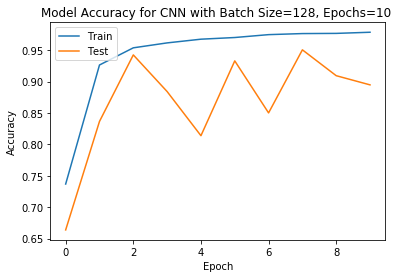

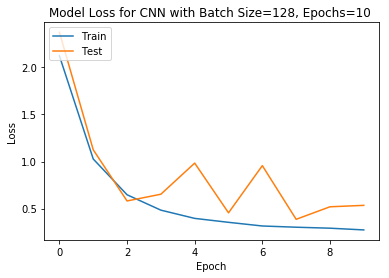

In [20]:
plt.plot(speechTrainData.history['acc'])
plt.plot(speechTrainData.history['val_acc'])
plt.title('Model Accuracy for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot Model  Loss
plt.plot(speechTrainData.history['loss'])
plt.plot(speechTrainData.history['val_loss'])
plt.title('Model Loss for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [21]:
def ConfusionMatrix(actual,predicts,numberClasses,classname):
    nc=numberClasses
    confmat=np.zeros([nc,nc])
    I = pd.Index(classname, name="rows")
    C = pd.Index(classname, name="columns")
    for ri in range (nc):
        value=[]
        trueIndex=np.where(actual[:,ri]==1)
        for j in range (len(trueIndex[0])):
            value.append(predict[trueIndex[0][j]])
        for rj in range (nc):
            confmat[ri][rj]=100*np.mean(value,axis=0)[rj]
    df = pd.DataFrame(data=confmat, index=I, columns=C)
    print(df)
    return

In [22]:
predict=model.predict(Xtrain)
print('Confusion Matrix for Train Data')
ConfusionMatrix(Ytrain,predict,num_classes,['Assamese','Gujrati','Hindi','Kannada','Punjabi','Telugu'])

Confusion Matrix for Train Data
columns    Assamese    Gujrati      Hindi    Kannada    Punjabi     Telugu
rows                                                                      
Assamese  99.972671   0.005488   0.003016   0.003100   0.012008   0.006505
Gujrati    0.036166  89.269233   9.015001   0.985160   0.531973   0.162449
Hindi      0.005672   1.780383  97.149277   0.950112   0.082318   0.032134
Kannada    0.010460   0.845146   4.365399  94.638854   0.064468   0.075585
Punjabi    0.054917  16.335750   4.101960   3.011315  76.365072   0.130925
Telugu     0.027008   2.398857   8.160517   4.054000   0.330746  85.029030


In [23]:
predict=model.predict(Xtest)
print('Confusion Matrix for Test Data')
ConfusionMatrix(Ytest,predict,num_classes,['Assamese','Gujrati','Hindi','Kannada','Punjabi','Telugu'])

Confusion Matrix for Test Data
columns    Assamese    Gujrati      Hindi    Kannada    Punjabi     Telugu
rows                                                                      
Assamese  99.899727   0.024939   0.005331   0.051326   0.011103   0.007677
Gujrati    0.033461  86.829209  11.332277   1.038766   0.630557   0.135764
Hindi      0.008832   3.482239  94.511718   1.897015   0.062086   0.038101
Kannada    0.011653   1.558473   6.386168  91.748971   0.135049   0.159702
Punjabi    0.058813  17.980617   5.081484   3.983762  72.716010   0.179345
Telugu     0.029060   2.556345  10.090307   4.188485   0.429739  82.705933
